this build a model that can classify a breast cancer tumor using two training classification:

1 = Malignant (Cancerous) - Present
0 = Benign (Not Cancerous) -Absent

In [1]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('breast/breast.csv', index_col=False)

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop(['id'], axis =1, inplace=True)
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
df.shape

(569, 31)

The info() method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# Check for missing variables
df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # data visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

%matplotlib inline 
This line is specific to Jupyter Notebook or Jupyter Lab environments. It allows the generated plots to be displayed directly within the notebook itself.

2. import numpy as np. These lines import the pandas and numpy libraries. pandas is a powerful library for data manipulation and 
analysis, while numpy provides support for mathematical operations and arrays.

3.import matplotlib.pyplot as plt  .This line imports the matplotlib.pyplot module, which provides a collection of functions for creating visualizations using matplotlib.

4. This line imports the norm module from the scipy.stats library. The norm module provides functions related to the normal distribution, such as calculating probability density function (PDF), cumulative distribution function (CDF), and generating random samples from a normal distribution.

5.import seaborn as sns .This line imports the seaborn library, which is a high-level interface for creating attractive and informative statistical graphics. Seaborn builds on top of matplotlib and provides additional functionality and customization options

6. plt.rcParams['figure.figsize'] = (15,8),,,This line sets the default figure size for plots created with matplotlib.pyplot. Here, it sets the figure size to 15 inches in width and 8 inches in height.

7. This line sets the default title size for the axes in the plots.

In [9]:
# usind clean data with "id"
df = pd.read_csv('breast.csv', index_col=False)
#df.drop('Unnamed: 32',axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,Column16343,Column16344,Column16345,Column16346,Column16347,Column16348,Column16349,Column16350,Column16351,Column16352
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,Column16343,Column16344,Column16345,Column16346,Column16347,Column16348,Column16349,Column16350,Column16351,Column16352
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088627,0.048919,0.181162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079645,0.038803,0.027414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.129300,0.074000,0.195700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.skew()

id                6.473752
radius_mean       0.942380
texture_mean      0.650450
perimeter_mean    0.990650
area_mean         1.645732
                    ...   
Column16348            NaN
Column16349            NaN
Column16350            NaN
Column16351            NaN
Column16352            NaN
Length: 16383, dtype: float64

Skewness is a measure of the asymmetry of the distribution of values in a dataset.

The skew() function returns the skewness values for each numerical column in the DataFrame.

in this case skewness is positive which means the distribution extends more to the right, and the mean is greater than the median.

In [12]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

df.diagnosis.unique(), you can obtain the unique values present in the "diagnosis" column, which will typically be an array containing the unique class labels, such as ['M', 'B'] for malignant and benign, respectively.

In [13]:
# Group by diagnosis and review the output.
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

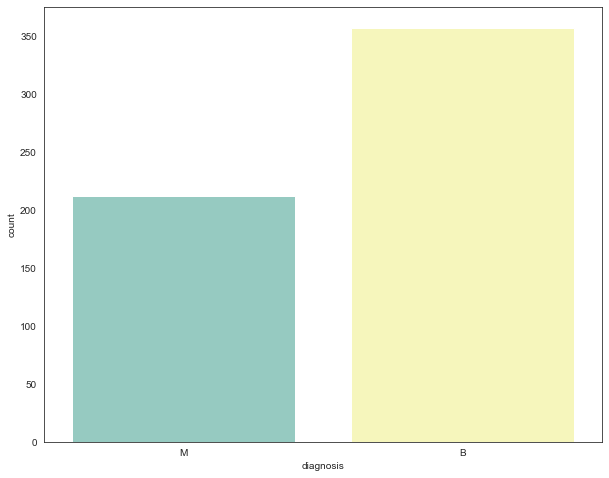

In [14]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(df['diagnosis'],label='Count',palette="Set3")

The line of code sns.set_style("white") sets the visual style of seaborn plots to "white". It sets the background color to white and removes any grid lines, giving the plot a clean and minimalist appearance.

The line sns.set_context({"figure.figsize": (10, 8)}) sets the context of the plot to have a figure size of 10 inches in width and 8 inches in height. This determines the overall size of the plot within the plotting area.

The line sns.countplot(df['diagnosis'], label='Count', palette="Set3") creates a countplot using seaborn. A countplot is a bar plot that shows the count of occurrences of each unique value in a categorical variable.

In this case, the countplot is created using the "diagnosis" column of the DataFrame df as the categorical variable. The label='Count' parameter sets the label for the y-axis as "Count". The palette="Set3" parameter specifies the color palette to be used for the bars in the countplot.

In [15]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,and __worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on
df_id_diag=df.loc[:,["id","diagnosis"]]
df_diag=df.loc[:,["diagnosis"]]

#For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]

print(df_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')


df_id_diag = df.loc[:,["id","diagnosis"]]
This line creates a new DataFrame df_id_diag by selecting two columns, "id" and "diagnosis", from the original DataFrame df using the loc accessor. The loc accessor allows you to select rows and columns by label. This line essentially creates a DataFrame that contains only the "id" and "diagnosis" columns.

df_diag = df.loc[:,["diagnosis"]]
This line creates another DataFrame df_diag by selecting only the "diagnosis" column from the original DataFrame df. It contains only the "diagnosis" column and is used to separate the target variable for further analysis or model training.

df_mean = df.iloc[:,1:11]
This line creates a DataFrame df_mean by using the iloc accessor to select columns from index 1 to 10 (columns 1 to 10, inclusive) from the original DataFrame df. These columns typically represent the mean values of various features related to breast cancer, such as radius, texture, perimeter, area, smoothness, compactness, etc. df_mean contains the selected columns for further analysis or model training.

df_se = df.iloc[:,11:22]
This line creates a DataFrame df_se by using the iloc accessor to select columns from index 11 to 21 (columns 11 to 21, inclusive) from the original DataFrame df. These columns typically represent the standard error values of the corresponding features. df_se contains the selected columns for further analysis or model training.

df_worst = df.iloc[:,23:]
This line creates a DataFrame df_worst by using the iloc accessor to select all columns from index 23 onwards from the original DataFrame df. These columns usually represent the worst or largest values observed for the corresponding features. df_worst contains the selected columns for further analysis or model training.

print(df_id_diag.columns)
This line prints the column names of the df_id_diag DataFrame. It displays the names of the columns "id" and "diagnosis" to the console.

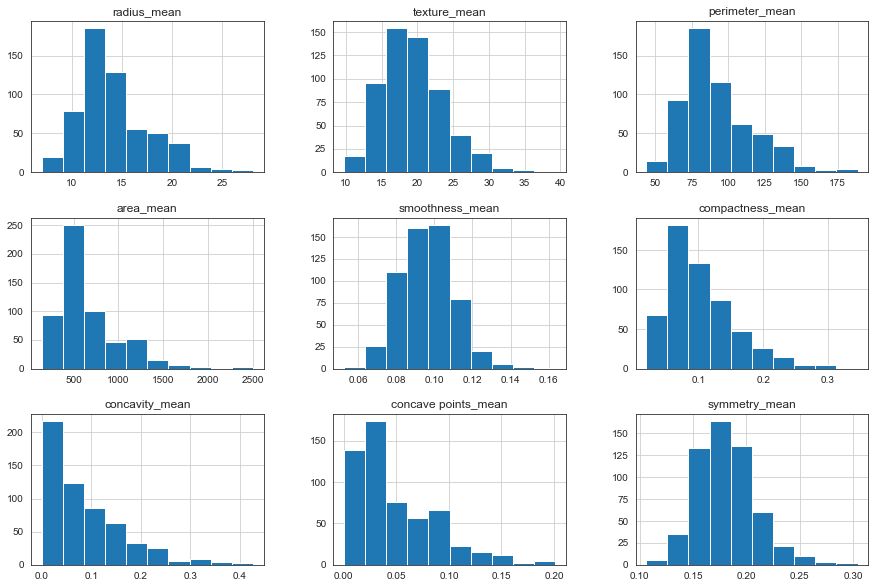

In [16]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=True,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

df_mean: The DataFrame df_mean contains the columns representing mean values of various features related to breast cancer.

.hist(): This method is used to create histograms for each column in the DataFrame.

bins=10: This parameter specifies the number of bins or intervals to divide the data range in each histogram. In this case, the data range is divided into 10 equally spaced bins.

figsize=(15, 10): This parameter determines the size of the resulting figure that contains all the histograms. It specifies the width and height of the figure in inches. Here, the figure size is set to 15 inches in width and 10 inches in height.

grid=False: This parameter controls whether grid lines are displayed on the histograms. Setting grid=False removes the grid lines.

uses - skewness,symmetry,data distribution ,indentifying outliners 

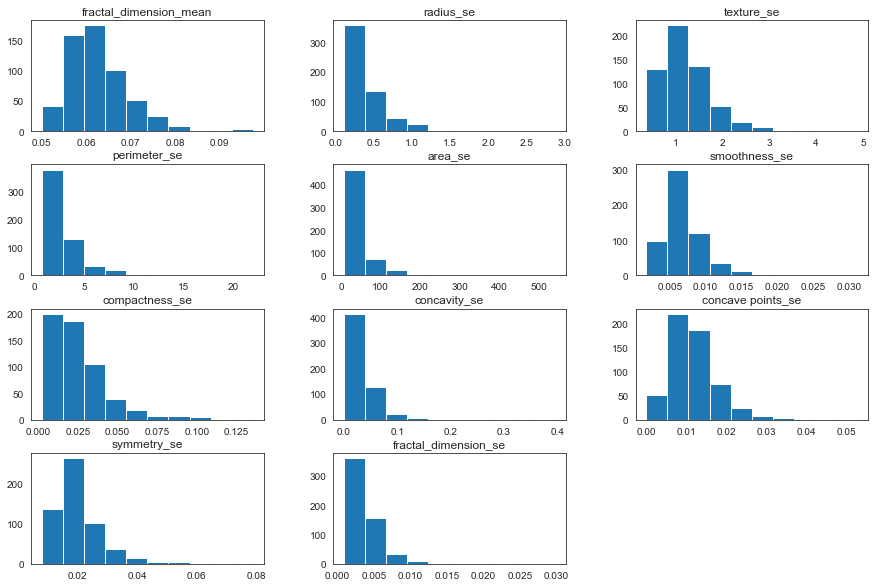

In [17]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

In [18]:
#Plot histograms of _worst variables
#hist_worst=df_worst.hist(bins=5, figsize=(15, 10),grid=False,)

In [19]:
#Density Plots
#plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
#                     sharey=False, fontsize=12, figsize=(15,10))


plt = df_mean.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, sharey=False, fontsize=12, figsize=(15, 10))
plt = : This line assigns the generated plot to the variable plt, which allows you to modify or interact with the plot later if needed.

df_mean.plot(kind='density', ...) : This is the main plotting function that creates the density plots for each column in df_mean. The kind='density' parameter specifies that density plots should be created.

subplots=True : This parameter specifies that each density plot should be displayed as a separate subplot.

layout=(4, 3) : This parameter determines the arrangement of the subplots in a grid. In this case, it creates a grid with 4 rows and 3 columns, allowing for a total of 12 subplots.

sharex=False : This parameter controls whether the subplots share the same x-axis. Setting sharex=False means that each subplot will have its own x-axis.

sharey=False : This parameter controls whether the subplots share the same y-axis. Setting sharey=False means that each subplot will have its own y-axis.

fontsize=12 : This parameter sets the font size for the plot elements, such as the axis labels and tick labels, to 12.

figsize=(15, 10) : This parameter determines the size of the resulting figure that contains all the density plots. It specifies the width and height of the figure in inches. Here, the figure size is set to 15 inches in width and 10 inches in height.

In [20]:
#Density Plots
#plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
#                    sharey=False, fontsize=12, figsize=(15,10))

In [21]:
#Density Plots
#plt = df_worst.plot(kind= 'kde', subplots=True, layout=(5,4), sharex=False, sharey=False, 
#                    fontsize=5, figsize=(15,10))

In [ ]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)

In [ ]:
# box and whisker plots
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
               fontsize=12)

In [ ]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('breast.csv', index_col=False)
#df.drop('Unnamed: 32',axis=1, inplace=True)

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

plt.style.use('fivethirtyeight')
This line sets the style of the plots to the "fivethirtyeight" style. The "fivethirtyeight" style is a predefined style provided by Matplotlib that mimics the visual style of the plots found on the FiveThirtyEight website.

sns.set_style("white")
This line sets the visual style of seaborn plots to "white". It sets the background color to white and removes any grid lines, giving the plot a clean and minimalist appearance.

df = pd.read_csv('breast.csv', index_col=False)
This line reads a CSV file named 'breast.csv' into a DataFrame called df. The pd.read_csv() function is used to read the CSV file, and the resulting DataFrame contains the data from the CSV file. The index_col=False parameter specifies that the CSV file does not contain an index column.

corr = df_mean.corr()
This line calculates the correlation matrix for the DataFrame df_mean. The corr() function is used to compute the pairwise correlation between the columns of df_mean. The resulting correlation matrix corr contains the correlation coefficients between the features.

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
These lines create a mask array to hide the upper triangle of the correlation matrix. The np.zeros_like() function creates an array of the same shape as corr filled with zeros. The np.triu_indices_from() function returns the indices for the upper triangle of the array, and these indices are set to True in the mask array.

df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')
These lines create a new figure and axes for the correlation heatmap plot. plt.subplots() creates a new figure and returns a tuple containing the figure and axes objects. The figsize=(8, 8) parameter specifies the size of the figure in inches. The plt.title() function sets the title of the plot to 'Breast Cancer Feature Correlation'.

cmap = sns.diverging_palette(260, 10, as_cmap=True)
This line creates a custom colormap using the diverging_palette() function from seaborn. The colormap represents a range of colors from 260 degrees (blue) to 10 degrees (red) on the color wheel. The resulting cmap object is a colormap that can be used to color the heatmap.

sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=2)
This line creates a heatmap using the seaborn heatmap() function. The heatmap visualizes the correlation matrix corr with certain settings. The parameters used include:

vmax=1.2: This sets the maximum value for the color scale of the heatmap to 1.2. Values exceeding this threshold will have the same color.

square='square': This parameter specifies that the heatmap should be square-shaped.

cmap=cmap: This sets the colormap of the heatmap to the custom colormap cmap created earlier.

mask=mask: This applies the mask to the heatmap, hiding the upper triangle of the correlation matrix.

ax=ax: This parameter specifies the axes on which the heatmap should be drawn.

annot=True: This enables the annotation

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('breast.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
This line creates a PairGrid plot using the seaborn PairGrid() function. The PairGrid is a convenient way to visualize pairwise relationships between multiple variables. Here, the PairGrid is constructed using a subset of columns from the DataFrame df, specifically columns 1 to 6. The hue='diagnosis' parameter specifies that the data points should be colored based on the 'diagnosis' column.

g = g.map_diag(plt.hist)
This line maps the diagonal elements of the PairGrid with a histogram plot using the map_diag() function. It applies the plt.hist function (from matplotlib.pyplot) to the diagonal subplots, creating histograms for each variable.

g = g.map_offdiag(plt.scatter, s=3)
This line maps the off-diagonal elements of the PairGrid with scatter plots using the map_offdiag() function. It applies the plt.scatter function to the off-diagonal subplots, creating scatter plots to visualize the relationships between pairs of variables. The s=3 parameter sets the size of the scatter points to 3, indicating smaller point sizes.

We can see strong positive relationship exists with mean values paramaters between 1 to 0.75.

The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

df = pd.read_csv('breast.csv', index_col=False)
#df.drop('Unnamed: 32',axis=1, inplace=True)
df.head(3)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Split data into X and y
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

# Encode categorical variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
These lines import necessary classes and functions from the scikit-learn library for data preprocessing and model evaluation.

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
These lines extract the feature matrix X and the target vector y from the DataFrame df. The iloc function is used to index the DataFrame based on integer positions. X is assigned the values from columns 2 to the end, representing the features, while y is assigned the values from column 1, representing the target variable.

le = LabelEncoder()
y = le.fit_transform(y)
These lines encode the categorical target variable y using the LabelEncoder class from scikit-learn. The LabelEncoder converts the categorical labels into numeric values. In this case, it assigns numeric labels to the target variable y by fitting the encoder with le.fit_transform(y).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
This line splits the data into training and testing sets using the train_test_split function. The X and y arrays are split into X_train, X_test, y_train, and y_test, with a test size of 0.2 (20% of the data) and a random state of 0 for reproducibility.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
These lines standardize the feature matrix X_train and X_test using the StandardScaler class from scikit-learn. The StandardScaler scales the features to have zero mean and unit variance, which can help improve the performance of certain machine learning algorithms. X_train is fitted and transformed using sc.fit_transform(X_train), while X_test is only transformed using sc.transform(X_test) to ensure that the same scaling is applied based on the statistics learned from X_train

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Split data into X and y
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

# Encode categorical variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.decomposition import PCA
This line imports the PCA class from scikit-learn, which is used to perform Principal Component Analysis.

pca = PCA(n_components=2)
This line creates an instance of the PCA class with n_components set to 2. It specifies that we want to reduce the dimensionality of the data to 2 principal components.

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
These lines apply the PCA transformation to both the training and testing sets.

pca.fit_transform(X_train) fits the PCA model to the training data X_train and then applies the dimensionality reduction to obtain the transformed data X_train with reduced dimensions. The fit_transform method both fits the PCA model to the data and transforms the data in a single step.

pca.transform(X_test) applies the dimensionality reduction learned from the training data to the testing data X_test. The transform method uses the learned PCA model to transform the data without re-estimating the principal components.

After applying PCA, the feature matrices X_train and X_test will have reduced dimensions, with each instance represented by only two principal components instead of the original number of features. This reduction in dimensionality can help simplify the data and potentially improve the performance of certain machine learning algorithms, especially when dealing with high-dimensional data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

from sklearn.preprocessing import StandardScaler
This line imports the StandardScaler class from scikit-learn, which is used for data normalization.

scaler = StandardScaler()
This line creates an instance of the StandardScaler class.

Xs = scaler.fit_transform(X)
This line applies the data normalization to the feature matrix X. The fit_transform method of the scaler object is called, which first fits the scaler to the data (scaler.fit(X)) to compute the mean and standard deviation of each feature, and then applies the transformation to normalize the data (scaler.transform(X)). The transformed data is assigned to the variable Xs.

Normalization, in this context, means centering the data around 0 and scaling it to remove the variance. It standardizes the features by subtracting the mean and dividing by the standard deviation of each feature. This process ensures that each feature has a mean of 0 and a standard deviation of 1, which can be beneficial for many machine learning algorithms that are sensitive to the scale of the features.

By normalizing the data, you make sure that all features are on a similar scale and have the same order of magnitude, which can help prevent certain features from dominating the learning process and improve the overall performance of the model.

In [ ]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

from sklearn.decomposition import PCA
This line imports the PCA class from scikit-learn, which is used for Principal Component Analysis.

pca = PCA(n_components=10)
This line creates an instance of the PCA class with n_components set to 10. It specifies that we want to extract 10 principal components from the normalized data.

fit = pca.fit(Xs)
This line fits the PCA model to the normalized feature matrix Xs. The fit method of the PCA object is called, passing Xs as the argument. This step calculates the principal components based on the input data.

After fitting the PCA model, the fit variable will contain the fitted PCA object, which can be used for further analysis or transformation. The principal components capture the most important information in the data and can be used as new features or for dimensionality reduction.

PCA is a dimensionality reduction technique that transforms the data into a lower-dimensional space while retaining the most relevant information. It achieves this by identifying the principal components, which are linear combinations of the original features that capture the maximum amount of variance in the data. By reducing the dimensionality, PCA can simplify the data representation and potentially improve the efficiency and interpretability of subsequent machine learning algorithms.

In [ ]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'],PCA_df['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'],PCA_df['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

X_pca = pca.transform(Xs)
This line applies the previously fitted PCA model (pca) to the normalized feature matrix Xs using the transform method. It transforms the data into the lower-dimensional space defined by the principal components. The transformed data is stored in the X_pca variable.

PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
These lines create a new DataFrame, PCA_df, to store the transformed data. Two columns, 'PCA_1' and 'PCA_2', are added to PCA_df, representing the first and second principal components, respectively. The values of the principal components are obtained from X_pca.

plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'], PCA_df['PCA_2'][df.diagnosis == 'M'], 'o', alpha=0.7, color='r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'], PCA_df['PCA_2'][df.diagnosis == 'B'], 'o', alpha=0.7, color='b')
These lines create scatter plots of the first two principal components, where each point represents an instance from the original dataset. The points are plotted using the 'PCA_1' values on the x-axis and 'PCA_2' values on the y-axis. The points are differentiated based on the diagnosis ('M' for malignant and 'B' for benign) using conditional indexing (df.diagnosis == 'M' and df.diagnosis == 'B'). Malignant points are plotted in red ('r') and benign points are plotted in blue ('b').

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant', 'Benign'])
plt.show()
These lines add labels to the x-axis and y-axis of the plot and create a legend. Finally, the plot is displayed using plt.show().

The scatter plot visualizes the data in the reduced two-dimensional space defined by the first two principal components. It allows you to observe the distribution and separation of the instances based on their diagnoses (malignant or benign) in this transformed space.

In [ ]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

This line calculates the explained variance ratio for each principal component in the PCA model. The explained_variance_ratio_ attribute returns an array containing the proportion of the variance in the original data explained by each principal component.

The var variable will store an array of values, where each value represents the proportion of the variance explained by a corresponding principal component. The values in the var array are sorted in descending order, indicating the amount of information each principal component captures.

By examining the explained variance ratio, you can determine the relative importance of each principal component in representing the data. Higher values indicate that the corresponding principal component captures more of the variance in the data, while lower values indicate less importance.

In [ ]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

var = pca.explained_variance_ratio_
This line calculates the explained variance ratio for each principal component in the PCA model and stores it in the var variable. The explained variance ratio represents the proportion of the total variance in the data explained by each principal component.

plt.plot(var)
This line creates a line plot using the plot function from matplotlib. It plots the values of var on the y-axis, representing the explained variance ratio, against the indices of the principal components on the x-axis.

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
These lines set the title of the plot and label the x-axis and y-axis to provide clear information about the plot.

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
This code adds a legend to the plot. The legend displays the label 'Eigenvalues from PCA'. The loc='best' argument determines the best position for the legend, borderpad adjusts the distance between the legend and the surrounding axes, shadow determines whether the legend has a shadow, and markerscale adjusts the size of the legend markers.

plt.show()
This line displays the scree plot.

The scree plot is a graphical representation of the eigenvalues (explained variance ratio) of the principal components in descending order. It helps in determining the number of principal components to retain in the analysis. The plot shows the decreasing proportion of variance explained by each principal component. The elbow or knee point in the plot is often considered as a point where the diminishing returns of additional components start.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression model
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Make predictions on test set
y_pred = lr.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
These lines import the LogisticRegression class from scikit-learn, which is used for logistic regression, and the accuracy_score function, which is used to calculate the accuracy of the model predictions.

lr = LogisticRegression(random_state=0)
This line creates an instance of the LogisticRegression class with a random state of 0. The random state is set for reproducibility of results.

lr.fit(X_train, y_train)
This line trains the logistic regression model on the training data. The fit method of the LogisticRegression object (lr) is called, with X_train as the feature matrix and y_train as the target variable. This step involves fitting the logistic regression model to the training data by estimating the coefficients that best fit the data.

y_pred = lr.predict(X_test)
This line makes predictions on the test data using the trained logistic regression model. The predict method of the LogisticRegression object is called, with X_test as the feature matrix. The model predicts the class labels for the test instances based on the learned coefficients.

accuracy = accuracy_score(y_test, y_pred)
This line calculates the accuracy of the model predictions by comparing them with the true labels (y_test). The accuracy_score function takes the true labels (y_test) and the predicted labels (y_pred) as input and returns the accuracy as a floating-point number.

print("Accuracy:", accuracy)
This line prints the accuracy of the logistic regression model on the test set.

The logistic regression model is a binary classification algorithm that predicts the probability of an instance belonging to a certain class. In this code snippet, the logistic regression model is trained on the training data and evaluated on the test data using accuracy as the evaluation metric. The accuracy represents the proportion of correctly predicted instances out of the total number of instances in the test set.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
These lines import the classification_report and confusion_matrix functions from scikit-learn's metrics module. The classification_report function generates a text report displaying various classification metrics, and the confusion_matrix function computes the confusion matrix to summarize the model's predictions.

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
This code prints the confusion matrix, which is a table that summarizes the predictions made by the model against the true labels. The confusion_matrix function takes the true labels (y_test) and the predicted labels (y_pred) as inputs and returns a 2D array representing the confusion matrix. Each element in the matrix indicates the number of instances belonging to a particular class. The printed confusion matrix provides insights into the model's performance in terms of true positives, true negatives, false positives, and false negatives.

print("Classification report:")
print(classification_report(y_test, y_pred))
This code prints the classification report, which provides a summary of various evaluation metrics for each class. The classification_report function takes the true labels (y_test) and the predicted labels (y_pred) as inputs and generates a text report containing metrics such as precision, recall, F1-score, and support. The precision represents the accuracy of positive predictions, recall represents the sensitivity or true positive rate, F1-score combines precision and recall, and support indicates the number of instances of each class in the test set.

Printing the confusion matrix and classification report helps in understanding the performance of the logistic regression model in terms of correctly and incorrectly classified instances, as well as the precision, recall, and F1-score for each class. These metrics provide insights into the model's predictive capabilities and can be used to assess its effectiveness in making accurate predictions.

# SVM

In [ ]:
# Load breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))


from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
These lines import the load_breast_cancer function from scikit-learn's datasets module and load the breast cancer dataset. The dataset contains features and target variables.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
This code splits the dataset into training and testing sets using the train_test_split function. It takes the features (data.data) and the target variables (data.target) as input and splits them into X_train (features for training), X_test (features for testing), y_train (target labels for training), and y_test (target labels for testing). The parameter test_size=0.2 specifies that 20% of the data will be used for testing, and random_state=42 sets the random seed for reproducibility.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
These lines normalize the feature data using the StandardScaler class from scikit-learn's preprocessing module. The StandardScaler scales the features to have zero mean and unit variance. The fit_transform method is used to fit the scaler to the training data and transform it, while the transform method is used to transform the test data using the learned scaling parameters.

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
This code creates an SVM model using the SVC class from scikit-learn's svm module. The SVM is configured with a linear kernel (kernel='linear') and a regularization parameter C=1.0. The random_state=42 sets the random seed for reproducibility. The model is then trained on the normalized training data using the fit method.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))
These lines import the accuracy_score, classification_report, and confusion_matrix functions from scikit-learn's metrics module. The accuracy_score function calculates the accuracy of the predictions by comparing them with the true labels (y_test). The confusion_matrix function computes the confusion matrix, and the classification_report function generates a text report with various classification metrics.

The predictions are made on the normalized test data using the trained SVM model (svm.predict(X_test)), and the accuracy, confusion matrix, and classification report are printed to evaluate the model's performance.

Overall, this code snippet demonstrates the steps involved in loading a dataset, splitting it into training and testing sets, normalizing the data, training an SVM model, and evaluating the model using various metrics.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (malignant)
y_pred_proba = svm.decision_function(X_test)

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
These lines import the necessary libraries. roc_curve and auc are functions from scikit-learn's metrics module for computing the ROC curve and AUC, respectively. plt is an alias for the matplotlib.pyplot module, used for creating the plot.

y_pred_proba = svm.decision_function(X_test)
This line calculates the predicted probabilities for the positive class (malignant) using the decision_function method of the SVM model (svm). The decision function returns the signed distance of samples to the separating hyperplane. In this case, it represents the confidence scores or probabilities for the positive class.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
This line computes the false positive rate (FPR), true positive rate (TPR), and corresponding thresholds for the ROC curve. The roc_curve function takes the true labels (y_test) and the predicted probabilities (y_pred_proba) as input.

roc_auc = auc(fpr, tpr)
This line computes the AUC (Area Under the Curve) by integrating the ROC curve using the auc function.

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
These lines plot the ROC curve. The plot function is used to plot the FPR on the x-axis and TPR on the y-axis. The label for the curve includes the AUC value. The plot function is also used to draw a dashed diagonal line representing a random classifier. The x-axis and y-axis limits are set, and labels are added. Finally, the plot is displayed using plt.show().

This code snippet allows you to visualize the performance of a binary classification model by plotting the ROC curve and calculating the AUC, providing insights into the trade-off between the true positive rate and false positive rate at different classification thresholds.

In [ ]:
from sklearn.metrics import confusion_matrix

# Get predicted classes for test set
y_pred = svm.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion matrix:')
print(conf_mat)


from sklearn.metrics import confusion_matrix
This line imports the confusion_matrix function from scikit-learn's metrics module. This function is used to compute the confusion matrix.

y_pred = svm.predict(X_test)
This line predicts the classes for the test set (X_test) using the SVM model (svm). The predict method assigns the predicted class labels based on the trained model.

conf_mat = confusion_matrix(y_test, y_pred)
This line computes the confusion matrix using the true labels (y_test) and the predicted labels (y_pred). The confusion matrix is a square matrix that summarizes the predictions of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions.

print('Confusion matrix:')
print(conf_mat)
These lines print the confusion matrix. The matrix is displayed as a tabular format, where the rows represent the true class labels and the columns represent the predicted class labels. The elements of the matrix represent the counts of samples falling into different categories.

The confusion matrix provides valuable information about the performance of a classification model, allowing you to assess the number of correct and incorrect predictions for each class and evaluate the model's ability to classify instances correctly.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predicted classes for test set
y_pred = svm.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(conf_mat, cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels, title, and ticks
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
tick_marks = [0, 1]
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

# Add annotations
thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[1]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, format(conf_mat[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_mat[i, j] > thresh else "black")

# Show plot
plt.show()


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
These lines import the necessary libraries: Matplotlib for visualization and scikit-learn's confusion_matrix function for computing the confusion matrix.

y_pred = svm.predict(X_test)
This line predicts the classes for the test set (X_test) using the SVM model (svm). The predict method assigns the predicted class labels based on the trained model.

conf_mat = confusion_matrix(y_test, y_pred)
This line computes the confusion matrix using the true labels (y_test) and the predicted labels (y_pred). The confusion matrix is a square matrix that summarizes the predictions of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions.

fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(conf_mat, cmap=plt.cm.Blues)
These lines create a figure and axes for the plot and create an imshow plot of the confusion matrix using a blue color map.

cbar = ax.figure.colorbar(im, ax=ax)
This line adds a color bar to the plot to indicate the color mapping for the values in the confusion matrix.

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
These lines set the labels for the x-axis, y-axis, and the title of the plot.

tick_marks = [0, 1]
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
These lines set the tick marks and tick labels for the x-axis and y-axis, representing the class labels. In this example, the labels are set as 'Benign' and 'Malignant'.

thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[1]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, format(conf_mat[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_mat[i, j] > thresh else "black")
These lines add annotations to each cell of the heatmap, displaying the count of samples in each category. The annotations are centered in each cell, and the color of the text is determined based on a threshold value.

plt.show()
This line displays the plot of the confusion matrix.

The resulting plot is a heatmap of the confusion matrix, where the colors represent the counts of samples falling into different categories. The annotations within each cell provide the actual counts. This visualization helps in understanding the performance of the classification model by visually analyzing the distribution of correct and incorrect predictions for each class.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Generate sample data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define classifiers
classifiers = [SVC(kernel="linear", C=0.025),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=3)]

# Train classifiers
for clf in classifiers:
    clf.fit(X_train, y_train)

# Plot decision boundaries
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    axes[i].set_title(clf.__class__.__name__)
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())
    axes[i].set_xticks(())
    axes[i].set_yticks(())
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
These lines import the necessary libraries for data generation, classification models, data splitting, accuracy measurement, visualization, and color mapping.

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
This line generates a synthetic dataset using the make_classification function. It creates a 2-dimensional dataset with 2 informative features, no redundant features, and 1 cluster per class.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
These lines split the dataset into training and testing sets using the train_test_split function. The training set will be used to train the classifiers, and the testing set will be used to evaluate their performance.

classifiers = [SVC(kernel="linear", C=0.025),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=3)]
This creates a list of classifiers to be trained and evaluated. In this example, three classifiers are included: SVM with a linear kernel, Gaussian Naive Bayes, and k-Nearest Neighbors with n_neighbors=3.

for clf in classifiers:
    clf.fit(X_train, y_train)
This loop iterates over the classifiers and trains each one on the training data using the fit method.

cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
These lines define the colormap for the plot, the step size for the meshgrid, and the boundaries for the plot. It also creates subplots for each classifier's decision boundary visualization.

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    axes[i].set_title(clf.__class__.__name__)
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())
    axes[i].set_xticks(())
    axes[i].set_yticks(())
plt.show()
These lines iterate over the classifiers and plot the decision boundaries for each one. It predicts the labels for all points on the meshgrid (xx.ravel(), yy.ravel()) using the trained classifier's predict method. The predictions are reshaped to match the meshgrid shape. The contourf function is used to plot the decision boundaries, and the scatter function is used to plot the training data points. The title, limits, and ticks are set for each subplot. Finally, the plot is displayed using plt.show().

The resulting plot shows the decision boundaries of the classifiers, with different regions corresponding to different predicted classes. This visualization helps in understanding how different classifiers separate the data points based on their features.

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X_train, y_train)

In [ ]:
result = model.predict(X)
print(result)

In [ ]:
import joblib
filename = 'Breast_Cancer.py'
joblib.dump(model,filename)

In [ ]:
pip install latex